In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Part II
df = pd.read_csv(
    "/rds/general/project/ppmi_verily/live/phenotypes2023/MDS_UPDRS_Part_II__Patient_Questionnaire.csv",
    parse_dates=["INFODT"]
)
df = df.rename(columns={"INFODT": "visit_date"})

# Compute baseline
baseline = df.groupby('PATNO')['visit_date'].min().reset_index()
baseline = baseline.rename(columns={'visit_date': 'baseline_date'})
df = df.merge(baseline, on='PATNO')
df['years_since_baseline'] = (df['visit_date'] - df['baseline_date']).dt.days / 365.25


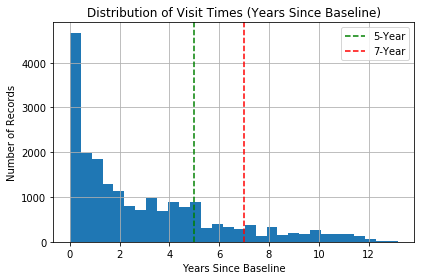

In [2]:
df['years_since_baseline'].hist(bins=30)
plt.axvline(5, color='green', linestyle='--', label='5-Year')
plt.axvline(7, color='red', linestyle='--', label='7-Year')
plt.title("Distribution of Visit Times (Years Since Baseline)")
plt.xlabel("Years Since Baseline")
plt.ylabel("Number of Records")
plt.legend()
plt.tight_layout()
plt.show()


In [3]:
# Count visits within ±0.5 years of target points
def count_near_year(df, year, tolerance=0.5):
    return df[(df['years_since_baseline'] >= year - tolerance) & 
              (df['years_since_baseline'] <= year + tolerance)].shape[0]

print("Visits near 5 years:", count_near_year(df, 5))
print("Visits near 7 years:", count_near_year(df, 7))


Visits near 5 years: 1591
Visits near 7 years: 722


In [4]:
def unique_patients_near_year(df, year, tolerance=0.5):
    return df[(df['years_since_baseline'] >= year - tolerance) & 
              (df['years_since_baseline'] <= year + tolerance)]['PATNO'].nunique()

print("Participants near 5 years:", unique_patients_near_year(df, 5))
print("Participants near 7 years:", unique_patients_near_year(df, 7))


Participants near 5 years: 1001
Participants near 7 years: 583
